## Clasificación binaria

* La última capa tendrá una neurona de salida con activación sigmoid para convertir a 0 o 1.
* La función de coste será Binary Cross Entropy, ya que es diferenciable (se pueden calcular derivadas sobre ella)

In [18]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
keras = tf.keras

In [5]:
data = load_breast_cancer()
X = data.data        # Matriz de características
y = data.target      # Vector de etiquetas (0 = maligno, 1 = benigno)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
# 0. random state
keras.backend.clear_session()
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# 1. Arquitectura red neuronal
model = keras.Sequential([
    # keras.layers.Input(shape=(X.shape[1])), # no es obligatoria cuando usamos Sequential así todo seguido
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'), # capa de salida para clasificación binaria
])

# 2. Compilar el modelo:
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy',
             keras.metrics.Precision(),
             keras.metrics.Recall(),
             keras.metrics.AUC()]
)

# 3. Fit model
# batch_size: por defecto es 32, indica cuántos ejemplos se utilizan en cada iteración del entrenamiento
model.fit(X_train, y_train, validation_split=0.2, epochs=20, verbose=1, batch_size=32) 

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.5670 - auc: 0.6200 - loss: 5.9289 - precision: 0.6801 - recall: 0.4928 - val_accuracy: 0.8022 - val_auc: 0.7247 - val_loss: 3.5641 - val_precision: 0.7632 - val_recall: 1.0000
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7830 - auc: 0.8514 - loss: 0.9269 - precision: 0.8486 - recall: 0.7962 - val_accuracy: 0.8681 - val_auc: 0.8409 - val_loss: 2.4358 - val_precision: 0.8485 - val_recall: 0.9655
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8295 - auc: 0.9076 - loss: 0.6127 - precision: 0.8995 - recall: 0.8190 - val_accuracy: 0.8901 - val_auc: 0.8511 - val_loss: 2.0922 - val_precision: 0.8636 - val_recall: 0.9828
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8662 - auc: 0.9106 - loss: 0.5605 - precision: 0.9055 - recall: 0.8792 - val_accuracy: 0.8901 - val_auc: 0.8487 - val_loss: 1.6977 - val_precision: 0.8636 - val_recall: 0.9828
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,629 (72.77 KB)

 Trainable params: 6,209 (24.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,420 (48.52 KB)

In [21]:
df_history = pd.DataFrame(model.history.history)
df_history.head()

,accuracy,auc,loss,precision,recall,val_accuracy,val_auc,val_loss,val_precision,val_recall
0,0.582418,0.637271,4.447689,0.731707,0.526316,0.802198,0.724660,3.564057,0.763158,1.000000
1,0.755495,0.823320,1.258329,0.839024,0.754386,0.868132,0.840909,2.435847,0.848485,0.965517
2,0.804945,0.874226,0.884530,0.882927,0.793860,0.890110,0.851097,2.092167,0.863636,0.982759
3,0.843407,0.881660,0.770956,0.886878,0.859649,0.890110,0.848746,1.697719,0.863636,0.982759
4,0.859890,0.896849,0.602086,0.886463,0.890351,0.857143,0.828109,1.261285,0.868852,0.913793


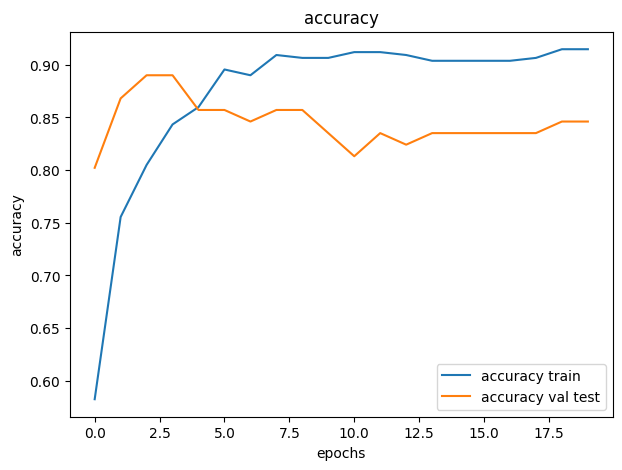

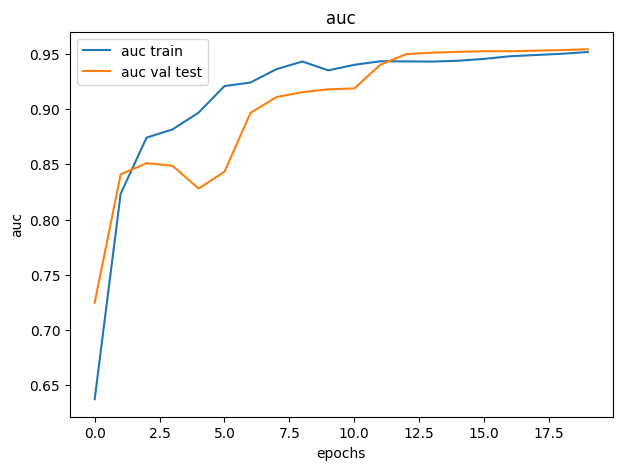

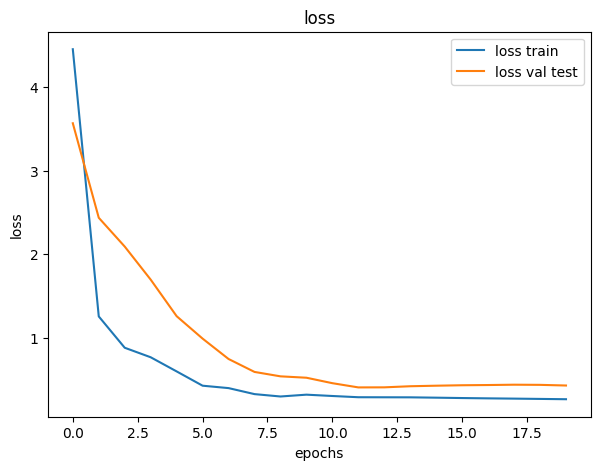

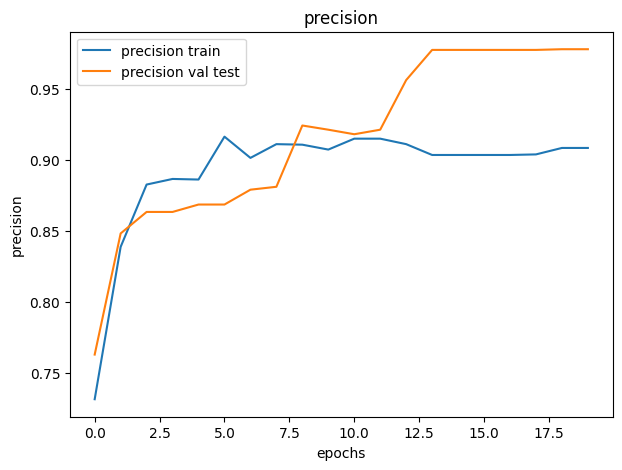

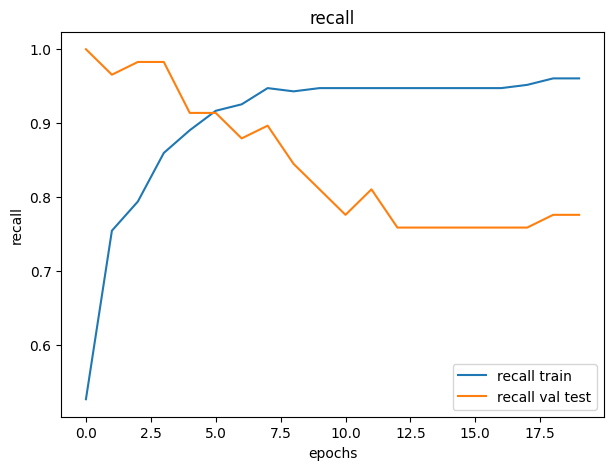

In [22]:
def plot_history(df_history):
    train_metrics = [col for col in df_history.columns if not col.startswith('val_')]
    for metric in train_metrics:
        plt.figure(figsize=(7, 5))
        plt.plot(df_history[metric], label=f'{metric} train')
        
        val_metric = f'val_{metric}'
        if val_metric in df_history.columns:
            plt.plot(df_history[val_metric], label=f'{metric} val test')
            
        plt.title(metric)
        plt.xlabel('epochs')
        plt.ylabel(metric)
        plt.legend()
        plt.show()
        
plot_history(df_history)

In [25]:
test_loss_bce, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(X_test, y_test)
print('test_loss_bce', test_loss_bce)
print('test_accuracy', test_accuracy)
print('test_precision', test_precision)
print('test_recall', test_recall)
print('test_auc', test_auc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8838 - auc: 0.9963 - loss: 0.2595 - precision: 1.0000 - recall: 0.8175
test_loss_bce 0.26888251304626465
test_accuracy 0.8684210777282715
test_precision 1.0
test_recall 0.7887324094772339
test_auc 0.9957419633865356


In [28]:
y_pred = model.predict(X_test).ravel() # lo pasamos a 1D
y_pred[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([9.6279576e-02, 7.4885725e-15, 2.0867017e-06, 9.5762968e-01,
       9.6628177e-01], dtype=float32)

In [30]:
y_pred_binario = np.where(y_pred >= 0.5, 1, 0)
y_pred_binario[:5]

array([0, 0, 0, 1, 1])

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
print("accuracy: ", accuracy_score(y_test, y_pred_binario))
print("precision: ", precision_score(y_test, y_pred_binario))
print("recall (Sensitivity): ", recall_score(y_test, y_pred_binario))
print("F1-score: ", f1_score(y_test, y_pred_binario))
print("AUC: ", roc_auc_score(y_test, y_pred_binario))
print(classification_report(y_test, y_pred_binario))

accuracy:  0.868421052631579
precision:  1.0
recall (Sensitivity):  0.7887323943661971
F1-score:  0.8818897637795275
AUC:  0.8943661971830985
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        43
           1       1.00      0.79      0.88        71

    accuracy                           0.87       114
   macro avg       0.87      0.89      0.87       114
weighted avg       0.90      0.87      0.87       114



In [32]:
df_comparison = pd.DataFrame({'real': y_test, 'prediccion': y_pred_binario})
df_comparison.head()

,real,prediccion
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1


In [34]:
model.save('bclassification_model.keras')